<a href="https://colab.research.google.com/github/sanghaimuskan/Heart-Diesease_Detector/blob/master/Heart_Disease_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
data = pd.read_csv('/content/datasets_33180_43520_heart.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


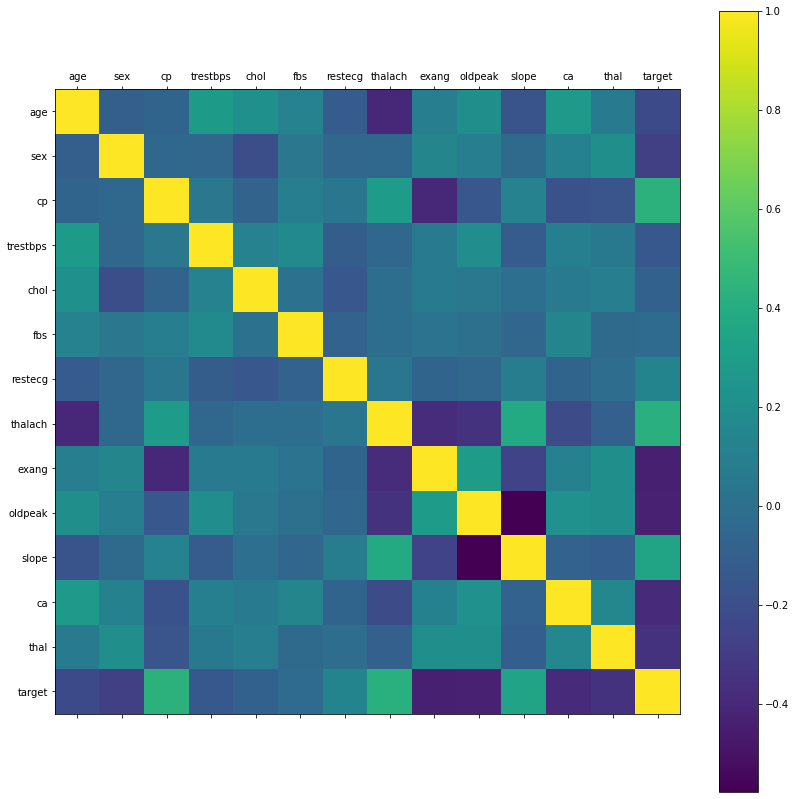

In [56]:
rcParams['figure.figsize']=20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ae178a2b0>,
      dtype=object)

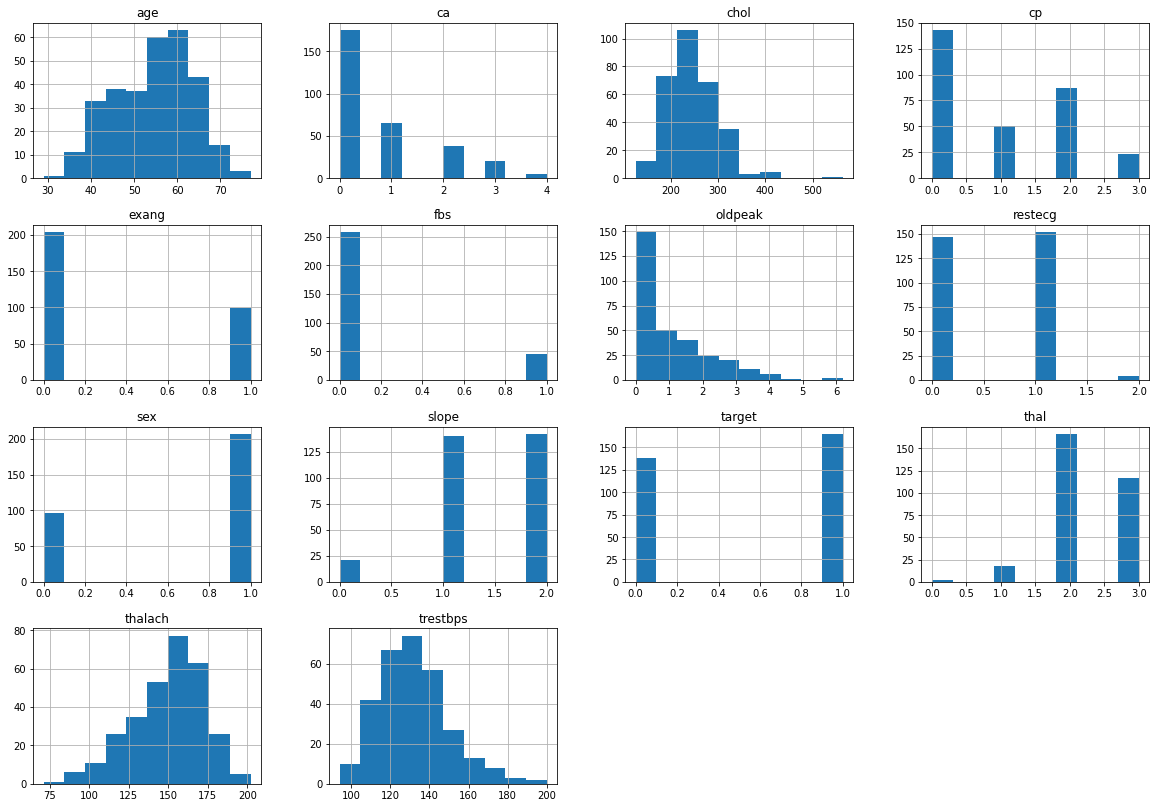

In [57]:
data.hist()

Text(0.5, 1.0, 'Each Target Class Count')

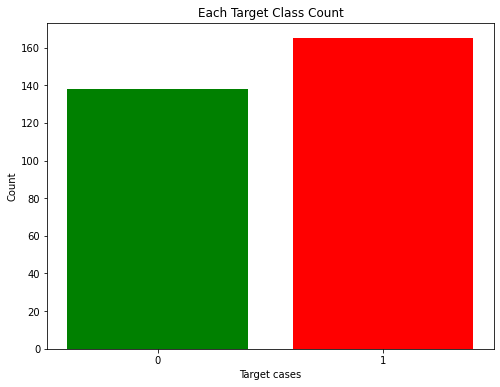

In [60]:
rcParams['figure.figsize'] = 8,6
plt.bar(data['target'].unique(), data['target'].value_counts(), color =['red','green'])
plt.xticks([0,1])
plt.xlabel('Target cases')
plt.ylabel('Count')
plt.title('Each Target Class Count')

In [61]:
dataset = pd.get_dummies(data, columns =['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [64]:
standardScaler = StandardScaler()
column_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[column_to_scale] = standardScaler.fit_transform(data[column_to_scale])

In [85]:
y = data['target']
X = data.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=0)

In [86]:
knn_scores=[]
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(X_train, y_train)
  knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Scores for different K values')

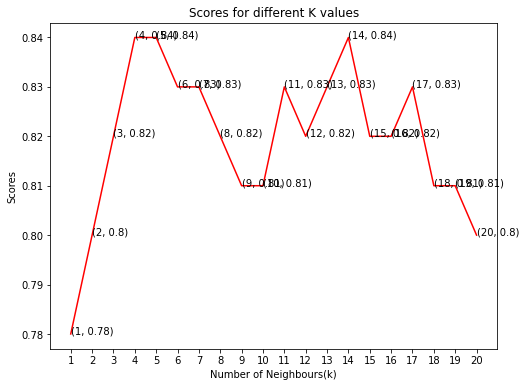

In [87]:
plt.plot([k for k in range(1,21)], knn_scores, color = 'red')
for i in range(1,21):
  plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([ i for i in range(1,21)])
plt.xlabel('Number of Neighbours(k)')
plt.ylabel('Scores')
plt.title('Scores for different K values')

In [88]:
print("Accuracy: ", knn_scores[3]*100,"%")

Accuracy:  84.0 %
